In [38]:
import shutil

source = r"Predicting Used Car Prices Using Machine Learning.ipynb"
destination = r"D:\SIRPI\Task\Predicting Used Car Prices Using Machine Learning.ipynb"

shutil.move(source, destination)

'D:\\SIRPI\\Task\\Predicting Used Car Prices Using Machine Learning.ipynb'

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Load Dataset
data = pd.read_csv("D:/SIRPI/used_cars.csv")  # Make sure the file is in the same directory as the notebook
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [22]:
# Convert 'price' and 'milage' to numeric
data['price'] = pd.to_numeric(data['price'].replace('[\$,]', '', regex=True))
data['milage'] = pd.to_numeric(data['milage'].replace('[, mi.]', '', regex=True))

# Extract 'engine_hp' from 'engine' column and convert to numeric
data['engine_hp'] = data['engine'].str.extract('(\d+\.?\d*)').astype(float)
data.drop(['engine'], axis=1, inplace=True)

# Fill missing values in engine_hp with the median
data['engine_hp'].fillna(data['engine_hp'].median(), inplace=True)

# Fill missing categorical values with 'Unknown'
for col in ['fuel_type', 'accident', 'clean_title']:
    data[col].fillna('Unknown', inplace=True)


In [24]:
# Define Features and Target
features = ['model_year', 'milage', 'engine_hp', 'brand', 'fuel_type', 'transmission', 'accident', 'clean_title']
X = data[features]
y = data['price']

# Preprocessing Pipelines
numeric_features = ['model_year', 'milage', 'engine_hp']
numeric_transformer = SimpleImputer(strategy='median')

categorical_features = ['brand', 'fuel_type', 'transmission', 'accident', 'clean_title']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combining Preprocessing Steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [25]:
# Creating a Model Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['model_year', 'milage',
                                                   'engine_hp']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand', 'fuel_type',
                                                   'transmission', 'accident',
                                                   'clean_title'])])),
                ('model', LinearRegression())])

In [26]:
# Making Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluating the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display Results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 19094698181.089848
R² Score: 0.06579750930083172


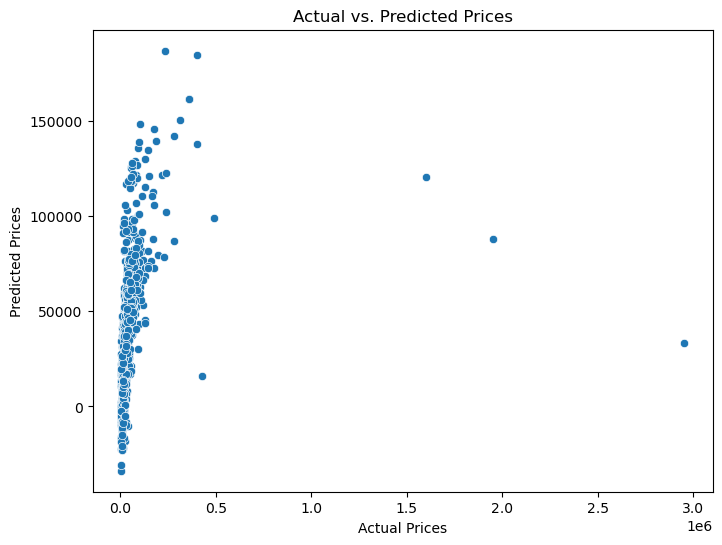

In [31]:
plt.figure(figsize=(8, 6))
sns.scattearplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

Mean Squared Error (MSE): 14042264042.89
R² Score (R2): 0.04


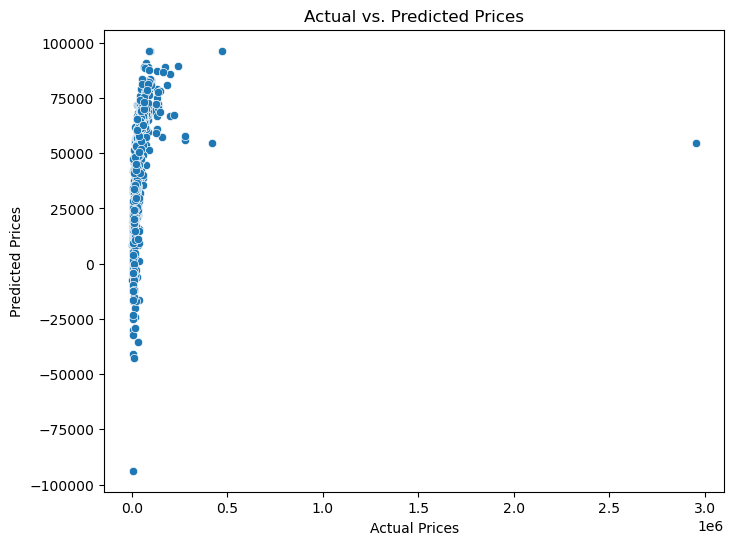

In [45]:
### 📌 Step 1: Import Necessary Libraries

# Importing essential libraries for data processing, machine learning, and visualization
import pandas as pd  # For handling data
import numpy as np  # For mathematical calculations
from sklearn.model_selection import train_test_split  # To split the data into training and testing
from sklearn.linear_model import LinearRegression  # To create and train the model
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate model performance
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For enhancing visualizations

### 📌 Step 2: Load Your Data (CSV File)

# Load the data file directly (Ensure the file 'used_cars.csv' is in the same folder as this notebook)
data = pd.read_csv("D:/SIRPI/used_cars.csv")

# Display the first 5 rows of the dataset to understand its structure
data.head()

### 📌 Step 3: Data Cleaning & Preparation

# Convert 'price' and 'milage' columns to numeric values by removing unwanted symbols
# This step is essential because the dataset might have '$' signs or 'mi.' text

data['price'] = pd.to_numeric(data['price'].replace('[\$,]', '', regex=True))
data['milage'] = pd.to_numeric(data['milage'].replace('[, mi.]', '', regex=True))

# Extract numerical horsepower values from 'engine' column
data['engine_hp'] = data['engine'].str.extract('(\d+\.?\d*)').astype(float)
data.drop(['engine'], axis=1, inplace=True)  # Drop the original 'engine' column as we don't need it now

# Fill missing 'engine_hp' values with the median (a good practice for numerical data)
data['engine_hp'].fillna(data['engine_hp'].median(), inplace=True)

# Drop any remaining rows with missing values
data.dropna(inplace=True)

### 📌 Step 4: Define Features (X) and Target (y)

# Features (X) are the columns used to predict the price
X = data[['model_year', 'milage', 'engine_hp']]

# Target (y) is what we want to predict, i.e., the price of the car
y = data['price']

### 📌 Step 5: Split Data for Training & Testing

# Splitting the dataset into training and testing parts (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 📌 Step 6: Train The Model (Linear Regression)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model with the training data
model.fit(X_train, y_train)

### 📌 Step 7: Test The Model

# Making predictions using the testing data
y_pred = model.predict(X_test)

# Displaying the performance of the model
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}')
print(f'R² Score (R2): {r2_score(y_test, y_pred):.2f}')

### 📌 Step 8: Visualize Results

# Visualizing how well the model performed by comparing actual vs. predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

### 📌 Step 9: Save Cleaned Data (Optional)

# If you want to save the cleaned data for future use, uncomment the line below
# data.to_csv('Cleaned_Used_Car_Data.csv', index=False)